<img src="../images/aeropython_logo.png" alt="AeroPython" style="width: 300px;"/>

# Introducción a SymPy

<img src="../images/sympy_logo.jpeg" style="width: 100px;"/>

__SymPy es una biblioteca de Python para matemática simbólica__. Apunta a convertirse en un sistema de algebra computacional (__CAS__) con todas sus prestaciones manteniendo el código tan simple como sea posible para manterlo comprensible y fácilmente extensible. SymPy está __escrito totalmente en Python y no requiere bibliotecas adicionales__. _Este proyecto comenzó en 2005, fue lanzado al público en 2007 y a él han contribuido durante estos años cientos de personas._

_Otros CAS conocidos son Mathematica y Maple, sin embargo ambos son software privativo y de pago. [Aquí](https://github.com/sympy/sympy/wiki/SymPy-vs.-Maple) puedes encontrar una comparativa de SymPy con Maple._

Hoy veremos cómo:

* Crear símbolos y expresiones.
* Manipular expresiones (simplificación, expansión...)
* Calcular derivadas e integrales.
* Límites y desarrollos en serie.
* Resolución de ecuaciones.
* Resolción de EDOs.
* Matrices

Sin embargo, SymPy no acaba aquí ni mucho menos...

## Documentación & SymPy Live Shell

In [1]:
# preserve
from IPython.display import IFrame
IFrame("http://docs.sympy.org/latest/index.html", width="700", height="400")

## SymPy Gamma

In [2]:
# preserve
IFrame("http://www.sympygamma.com/input/?i=integrate%281+%2F+%281+%2B+x^2%29%29", width="700", height="400")

## Creación de símbolos

Lo primero, como siempre, es importar aquello que vayamos a necesitar. La manera usual de hacerlo con SymPy es importar la función `init_session`:
```
from sympy import init_session
init_session(use_latex=True)```


El comando `init_session` llevaría a cabo algunas acciones por nostros:

* Gracias a `use_latex=True` obtenemos la salida en $\LaTeX$.
* __Crea una serie de variables__ para que podamos ponernos a trabajar en el momento.

Estas capacidades volverán a estar disponibles cuando el problema se corrija.

In [3]:
from sympy import init_session

In [4]:
init_session(use_latex=True)

IPython console for SymPy 1.4 (Python 3.7.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [5]:
# preserve
from sympy import (symbols, pi, I, E, cos, sin, exp, tan, simplify, expand, factor, collect,
                   apart, cancel, expand_trig, diff, Derivative, Function, integrate, limit,
                   series, Eq, solve, dsolve, Matrix, N)

<div class="alert alert-info"><strong>Nota:</strong>
En Python, no se declaran las variables, sin embargo, no puedes usar una hasta que no le hayas asignado un valor. Si ahora intentamos crear una variable "a" que sea "a = 2 * b", veamos qué ocurre:
</div>

In [6]:
# Intentamos usar un símbolo que no hemos creado
a = 2 * b

NameError: name 'b' is not defined

Como en `b` no había sido creada, Python no sabe qué es `b`.

Esto mismo nos ocurre con los símbolos de SymPy. __Antes de usar una variable, debo decir que es un símbolo y asignárselo:__

In [7]:
# Creamos el símbolo a
a = symbols('a')
a

In [8]:
# Número pi
(a + pi) ** 2

In [9]:
# Unidad imaginaria
a + 2 * I

In [10]:
# Número e
E

In [11]:
# Vemos qué tipo de variable es a
type(a)

sympy.core.symbol.Symbol

Ahora ya podría crear `b = 2 * a`:

In [12]:
b = 2 * a
b

In [13]:
type(b)

sympy.core.mul.Mul

¿Qué está ocurriendo? Python detecta que a es una variable de tipo `Symbol` y al multiplicarla por `2` devuelve una variable de Sympy.

Como Python permite que el tipo de una variable cambie, __si ahora le asigno a `a` un valor float deja de ser un símbolo.__

In [14]:
a = 2.26492
a

In [15]:
type(a)

float

---
__Las conclusiones son:__

* __Si quiero usar una variable como símbolo debo crearla previamente.__
* Las operaciones con símbolos devuelven símbolos.
* Si una varibale que almacenaba un símbolo recibe otra asignación, cambia de tipo.

---

__Las variables de tipo `Symbol` actúan como contenedores en los que no sabemos qué hay (un real, un complejo, una lista...)__. Hay que tener en cuenta que: __una cosa es el nombre de la variable y otra el símbolo con el que se representa__.

In [16]:
#creación de símbolos
coef_traccion = symbols('c_T')
coef_traccion

Incluso puedo hacer cosas raras como:

In [17]:
# Diferencia entre variable y símbolo
a = symbols('b')
a

Además, se pueden crear varos símbolos a la vez:

In [18]:
x, y, z, t = symbols('x y z t')

y símbolos griegos:

In [19]:
w = symbols('omega')
W = symbols('Omega')
w, W

![](../images/simplification_sympy.png)
_Fuente: Documentación oficial de SymPy_

__Por defecto, SymPy entiende que los símbolos son números complejos__. Esto puede producir resultados inesperados ante determinadas operaciones como, por ejemplo, lo logaritmos. __Podemos indicar que la variable es real, entera... en el momento de la creación__:

In [20]:
# Creamos símbolos reales
x, y, z, t = symbols('x y z t', real=True)

In [21]:
# Podemos ver las asunciones de un símbolo
x.assumptions0

{'real': True,
 'commutative': True,
 'complex': True,
 'imaginary': False,
 'hermitian': True}

## Expresiones

Comencemos por crear una expresión como: $\cos(x)^2+\sin(x)^2$

In [30]:
expr = cos(x)**2 + sin(x)**2
expr

### `simplify()`

Podemos pedirle que simplifique la expresión anterior:

In [31]:
simplify(expr)

En este caso parece estar claro lo que quiere decir más simple, pero como en cualquier _CAS_ el comando `simplify` puede no devolvernos la expresión que nosotros queremos. Cuando esto ocurra necesitaremos usar otras instrucciones.

### `.subs()`

En algunas ocasiones necesitaremos sustituir una variable por otra, por otra expresión o por un valor.

In [32]:
expr

In [33]:
# Sustituimos x por y ** 2
expr.subs(x, y**2)

In [34]:
# ¡Pero la expresión no cambia!
expr

In [35]:
# Para que cambie la expresión
expr = expr.subs(x, y**2)
expr

Cambia el `sin(y)` por `exp(y)`

In [38]:
expr.subs(sin(y**2), exp(y))

Particulariza la expresión $sin(x) + 3 x $ en $x = \pi$

In [39]:
(sin(x) + 3 * x).subs(x, pi)

__Aunque si lo que queremos es obtener el valor numérico lo mejor es `.evalf()`__

In [40]:
(sin(x) + 3 * x).subs(x, pi).evalf(25)

In [41]:
#ver pi con 25 decimales
pi.evalf(25)

In [42]:
#el mismo resultado se obtiene ocn la función N()
N(pi,25)

# Simplificación

SymPy ofrece numerosas funciones para __simplificar y manipular expresiones__. Entre otras, destacan:

* `expand()`
* `factor()`
* `collect()`
* `apart()`
* `cancel()`

Puedes consultar en la documentación de SymPy lo que hace cada una y algunos ejemplos. __Existen también funciones específicas de simplificación para funciones trigonométricas, potencias y logaritmos.__ Abre [esta documentación](http://docs.sympy.org/latest/tutorial/simplification.html) si lo necesitas.

##### ¡Te toca!

Pasaremos rápidamente por esta parte, para hacer cosas "más interesantes". Te proponemos algunos ejemplos para que te familiarices con el manejor de expresiones:

__Crea las expresiones de la izquierda y averigua qué función te hace obtener la de la derecha:__

expresión 1| expresión 2
:------:|:------:
$\left(x^{3} + 3 y + 2\right)^{2}$    |    $x^{6} + 6 x^{3} y + 4 x^{3} + 9 y^{2} + 12 y + 4$
$\frac{\left(3 x^{2} - 2 x + 1\right)}{\left(x - 1\right)^{2}} $ | $3 + \frac{4}{x - 1} + \frac{2}{\left(x - 1\right)^{2}}$
$x^{3} + 9 x^{2} + 27 x + 27$         |    $\left(x + 3\right)^{3}$
$\sin(x+2y)$                          |    $\left(2 \cos^{2}{\left (y \right )} - 1\right) \sin{\left (x \right )} + 2 \sin{\left (y \right )} \cos{\left (x \right )} \cos{\left (y \right )}$


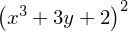

In [43]:
#1
expr1 = (x ** 3 + 3 * y + 2) ** 2
expr1

In [44]:
expr1_exp = expr1.expand()
expr1_exp

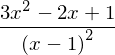

In [45]:
#2
expr2 = (3 * x ** 2 - 2 * x + 1) / (x - 1) ** 2
expr2

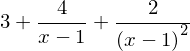

In [46]:
expr2.apart()

In [47]:
#3
expr3 = x ** 3 + 9 * x ** 2 + 27 * x + 27
expr3

In [48]:
expr3.factor()

In [49]:
#4
expr4 = sin(x + 2 * y)
expr4

In [50]:
expand(expr4)

In [51]:
expand_trig(expr4)

In [52]:
expand(expr4, trig=True)

# Derivadas e integrales

Puedes derivar una expresion usando el método `.diff()` y la función `dif()`

In [53]:
#creamos una expresión
expr = cos(x)

#obtenemos la derivada primera con funcion
diff(expr, x)

In [54]:
#utilizando método
expr.diff(x)

__¿derivada tercera?__

In [55]:
expr.diff(x, x, x)

In [56]:
expr.diff(x, 3)

__¿varias variables?__

In [57]:
expr_xy = y ** 3 * sin(x) ** 2 + x ** 2 * cos(y)
expr_xy

In [58]:
diff(expr_xy, x, 2, y, 2)

__Queremos que la deje indicada__, usamos `Derivative()`

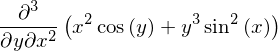

In [59]:
Derivative(expr_xy, x, 2, y)

__¿Será capaz SymPy de aplicar la regla de la cadena?__

In [60]:
# Creamos una función F
F = Function('F')
F(x)

In [61]:
# Creamos una función G
G = Function('G')
G(x)

$$\frac{d}{d x} F{\left (G(x) \right )} $$

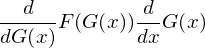

In [62]:
# Derivamos la función compuesta F(G(x))
F(G(x)).diff(x)

En un caso en el que conocemos las funciones:

In [63]:
# definimos una f
f = 2 * y * exp(x)
f

In [64]:
# definimos una g(f)
g = f **2 * cos(x) + f
g

In [65]:
#la derivamos
diff(g,x)

##### Te toca integrar

__Si te digo que se integra usando el método `.integrate()` o la función `integrate()`__. ¿Te atreves a integrar estas casi inmediatas...?:

$$\int{\cos(x)^2}dx$$
$$\int{\frac{dx}{\sin(x)}}$$
$$\int{\frac{dx}{(x^2+a^2)^2}}$$



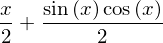

In [66]:
int1 = cos(x) ** 2
integrate(int1)

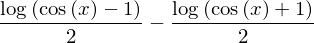

In [67]:
int2 =  1 / sin(x)
integrate(int2)

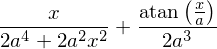

In [68]:
x, a = symbols('x a', real=True)

int3 = 1 / (x**2 + a**2)**2
integrate(int3, x)

# Límites

Calculemos este límite sacado del libro _Cálculo: definiciones, teoremas y resultados_, de Juan de Burgos:

$$\lim_{x \to 0} \left(\frac{x}{\tan{\left (x \right )}}\right)^{\frac{1}{x^{2}}}$$

Primero creamos la expresión:

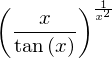

In [69]:
x = symbols('x', real=True)
expr = (x / tan(x)) ** (1 / x**2)
expr

Obtenemos el límite con la función `limit()` y si queremos dejarlo indicado, podemos usar `Limit()`:

In [70]:
limit(expr, x, 0)

# Series

Los desarrollos en serie se pueden llevar a cabo con el método `.series()` o la función `series()`

In [71]:
#creamos la expresión
expr = exp(x)
expr

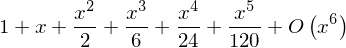

In [72]:
#la desarrollamos en serie
series(expr)

Se puede especificar el número de términos pasándole un argumento `n=...`. El número que le pasemos será el primer término que desprecie.

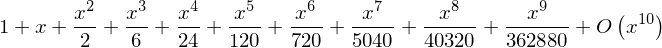

In [73]:
# Indicando el número de términos
series(expr, n=10)

Si nos molesta el $\mathcal{O}(x^{10})$ lo podemos quitar con `removeO()`:

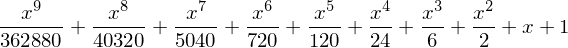

In [74]:
series(expr, n=10).removeO()

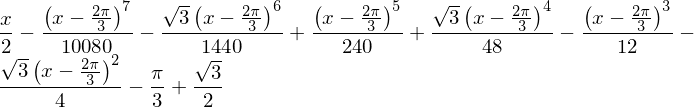

In [75]:
series(sin(x), n=8, x0=pi/3).removeO().subs(x, x-pi/3)

---

## Resolución de ecuaciones

Como se ha mencionado anteriormente las ecuaciones no se pueden crear con el `=`

In [76]:
#creamos la ecuación
ecuacion = Eq(x ** 2 - x, 3)
ecuacion

In [77]:
# También la podemos crear como
Eq(x ** 2 - x -3)

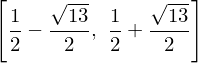

In [78]:
#la resolvemos
solve(ecuacion)

Pero la gracia es resolver con símbolos, ¿no?
$$a e^{\frac{x}{t}} = C$$

In [79]:
# Creamos los símbolos y la ecuación
a, x, t, C = symbols('a, x, t, C', real=True)
ecuacion = Eq(a * exp(x/t), C)
ecuacion

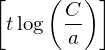

In [80]:
# La resolvemos
solve(ecuacion ,x)

Si consultamos la ayuda, vemos que las posibilidades y el número de parámetros son muchos, no vamos a entrar ahora en ellos, pero ¿se ve la potencia?

## Ecuaciones diferenciales

Tratemos de resolver, por ejemplo:

$$y{\left (x \right )} + \frac{d}{d x} y{\left (x \right )} + \frac{d^{2}}{d x^{2}}  y{\left (x \right )} = \cos{\left (x \right )}$$

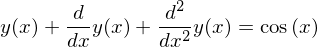

In [87]:
x = symbols('x', real=True)
y = Function('y')
ecuacion_dif = Eq(y(x).diff(x,2) + y(x).diff(x) + y(x), cos(x))
ecuacion_dif

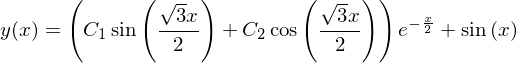

In [88]:
#resolvemos
dsolve(ecuacion_dif, f(x))

# Matrices

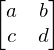

In [89]:
#creamos una matriz llena de símbolos
a, b, c, d = symbols('a b c d')
A = Matrix([
            [a, b],
            [c, d]
    ])
A

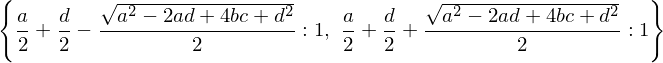

In [90]:
#sacamos autovalores
A.eigenvals()

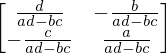

In [91]:
#inversa
A.inv()

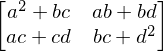

In [92]:
#elevamos al cuadrado la matriz
A ** 2

---

_Esto ha sido un rápido recorrido por algunas de las posibilidades que ofrece SymPy . El cálculo simbólico es un terreno díficil y este joven paquete avanza a pasos agigantados gracias a un grupo de desarrolladores siempre dispuestos a mejorar y escuchar sugerencias. Sus posibilidades no acaban aquí. En la siguiente clase presentaremos el paquete `mechanics`, pero además cuenta con herramientas para geometría, mecánica cuántica, teoría de números, combinatoria... Puedes echar un ojo [aquí](http://docs.sympy.org/latest/modules/index.html)._

---

#### <h4 align="right">¡Síguenos en Twitter!
<br/>
<a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script> 

Este notebook ha sido realizado por: Juan Luis Cano y Álex Sáez.
 
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

##### <script src="//platform.linkedin.com/in.js" type="text/javascript"></script> <script type="IN/MemberProfile" data-id="http://es.linkedin.com/in/juanluiscanor" data-format="inline" data-related="false"></script> <script src="//platform.linkedin.com/in.js" type="text/javascript"></script> <script type="IN/MemberProfile" data-id="http://es.linkedin.com/in/alejandrosaezm" data-format="inline" data-related="false"></script>

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [ ]:
%%html
<a href="https://twitter.com/Pybonacci" class="twitter-follow-button" data-show-count="false">Follow @Pybonacci</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

In [ ]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())